This notebook contains some general statistics about the reviews - with the use of Python, a small fraction of NLTK tools and matplotlib to illustrate. There is no ML used in the code.

In [ ]:
import nltk
from nltk import FreqDist
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random

# Number of reviews

In [ ]:
# count the number of reviews

file = "Cell_Phones_&_Accessories.txt"
f_hand = open(file, "r+", encoding="UTF-8")
contents = f_hand.readlines()
print("Number of text lines:", len(contents))

# it is just enough to count the number of lines with "product/title:" as far as each review has this line:
product_lines = [line for line in contents if "product/title:" in line and len(line)>16] #extract product names
print("Reviews number:", len(product_lines))

Number of text lines: 868230
Reviews number: 78383


# Number of products and most reviewed ones

In [ ]:
# get a set of products

product_names = [line[15:] for line in product_lines] # to remove "product/title:" and leave just the name

print("Number of products:", len(set(product_names)), "\n")

# create a frequency distribution of product names
fdist = FreqDist(product_names)
most_common_pr = fdist.most_common()
ten_common = most_common_pr[:10]

# print out 10 most reviewed products + num of reviews
print("10 most popular products:", "\n")
for line in ten_common: # it is a list of tuples
  print("\033[1m" + "Product:", "\033[0m" + line[0], 
         "\033[1m"+ "Reviews:", "\033[0m" + str(line[1]), "\n")

Number of products: 7149 

10 most popular products: 

Product: Plantronics Voyager 510 Bluetooth Headset [Retail Packaging]
 Reviews: 3443 

Product: Motorola HS850 Bluetooth Headset (Color Sent Based on Availability. Comes in Black, Blue and Grey, or Silver)[Bulk Packaged]
 Reviews: 984 

Product: Samsung WEP200 Bluetooth Wireless Phones Headset - Retail Packaging - Black
 Reviews: 848 

Product: Motorola H700 Bluetooth Headset [Motorola Retail Packaging]
 Reviews: 628 

Product: Jawbone Noise Shield Bluetooth Headset (Black) [Retail Packaged]
 Reviews: 623 

Product: Motorola MOTOROKR S9 Bluetooth Active Headphones (Red,Black) [Retail Packaging]
 Reviews: 558 

Product: Coby CA-747 Dual Position CD/MD/MP3 Cassette Adapter
 Reviews: 528 

Product: BlueAnt Supertooth Light Bluetooth Speakerphone (Black)
 Reviews: 515 

Product: Motorola T305 Bluetooth Portable Car Speaker
 Reviews: 509 

Product: Sony Ericsson T610 Phone (T-Mobile)
 Reviews: 501 



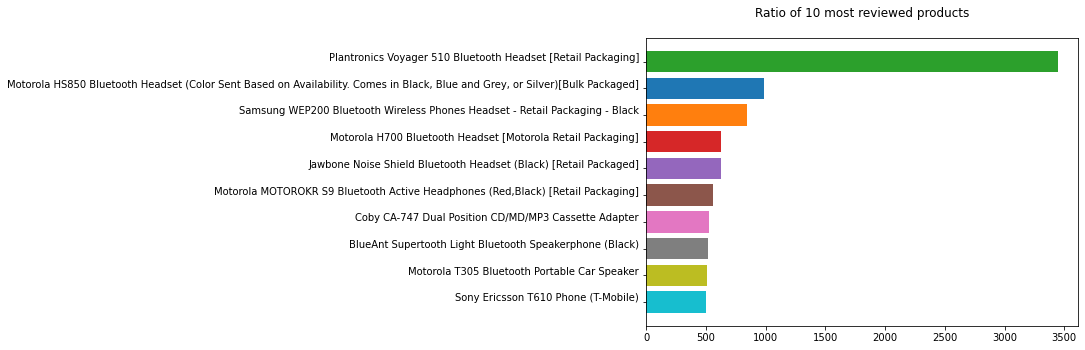

In [ ]:
# bar chart of 10 most popular products using matplotlib
colors = ['#2ca02c', '#1f77b4', '#ff7f0e', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

fig1 = plt.figure()
ax1 = fig1.add_axes([0,0,1,1])
products = [line[0] for line in ten_common]
sizes = [line[1] for line in ten_common]
ax1.barh(products, sizes, color=colors)

ax1.set_title("Ratio of 10 most reviewed products" + "\n")
plt.gca().invert_yaxis()
plt.show()

Conclusion: the most reviewed products are Plantronics Voyager 510 Bluetooth Headset, Motorola HS850 Bluetooth Headset, Samsung WEP200 Bluetooth Wireless Phones Headset, Motorola H700 Bluetooth Headset, and Jawbone Noise Shield Bluetooth Headset. Interestingly, the top-reviewed product (Plantronics Voyager 510 Bluetooth Headset) has 4 times more reviews than the runner-up Motorola HS850 Bluetooth Headset.

# Statistics for each of top-5 reviewed products

In [1]:
# extract review title, score and text
reviews = [line for line in contents 
           if "product/title" in line
           or "review/score" in line
           or "review/text" in line
           ]

# the new list is to be split into separate lists each containing title, 
# score and text of an individual review
reviews = [reviews[x:x+3] for x in range(0, len(reviews), 3)]

NameError: name 'contents' is not defined

In [ ]:
def item_statistics(product_title, reviews):
    # this funtion will give statistics about an individual review
  num_reviews = 0
    
    # we will update each score when we encounter it
  (score1, score2, score3, score4, score5) = (0, 0, 0, 0, 0) 
  name_line = "product/title: " + product_title + "\n"

  for review in reviews:
    # count the number of reviews for the given product
    if name_line == review[0]:
      num_reviews += 1
    # update each score (number of reviews containing the given score):
      if review[1] == "review/score: 1.0\n":
        score1 += 1
      elif review[1] == "review/score: 2.0\n":
        score2 += 1
      elif review[1] == "review/score: 3.0\n":
        score3 += 1
      elif review[1] == "review/score: 4.0\n":
        score4 += 1
      else:
        score5 += 1

    else:
      continue

    # count the average score 
  avg_score = ((1 * score1) + (2 * score2) + (3 * score3) 
              + (4 * score4) + (5 * score5)) / num_reviews 

  print("Statistics for " + "\033[1m" + product_title + "\033[0m")
  print("\nGeneral rating:", round(avg_score, 1), "\n", 
        "\nReviews with rating 1.0:", score1,
        "\nReviews with rating 2.0:", score2,
        "\nReviews with rating 3.0:", score3,
        "\nReviews with rating 4.0:", score4,
        "\nReviews with rating 5.0:", score5, "\n"
        )
  
    # bar plot with scores
  fig = plt.figure()
  ax = fig.add_axes([0,0,1,1])
  scores = ["5.0", "4.0", "3.0", "2.0", "1.0"]
  score_numbers = [score5, score4, score3, score2, score1]
  ax.barh(scores, score_numbers, color="#2ca02c")
  ax.set_title(product_title + " - score distribution" + "\n")
  plt.gca().invert_yaxis()
  plt.show()

In [ ]:
top10items = [line[0][:-1] for line in ten_common]

**Statistics for top-5 reviewed products**

Statistics for Plantronics Voyager 510 Bluetooth Headset [Retail Packaging]

General rating: 4.2 
 
Reviews with rating 1.0: 189 
Reviews with rating 2.0: 187 
Reviews with rating 3.0: 286 
Reviews with rating 4.0: 997 
Reviews with rating 5.0: 1784 



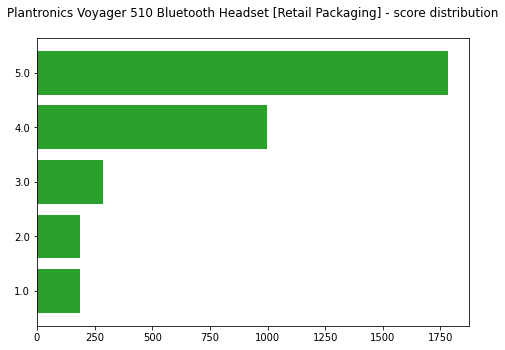

In [ ]:
item_statistics(top10items[0], reviews)

Statistics for Motorola HS850 Bluetooth Headset (Color Sent Based on Availability. Comes in Black, Blue and Grey, or Silver)[Bulk Packaged]

General rating: 3.4 
 
Reviews with rating 1.0: 167 
Reviews with rating 2.0: 128 
Reviews with rating 3.0: 150 
Reviews with rating 4.0: 271 
Reviews with rating 5.0: 268 



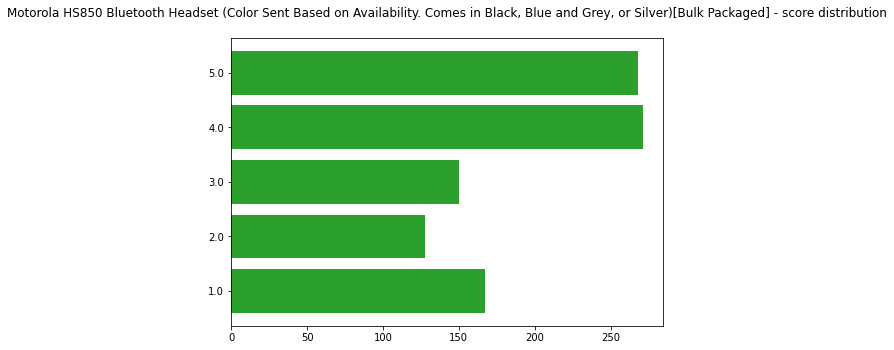

In [ ]:
item_statistics(top10items[1], reviews)

Statistics for Samsung WEP200 Bluetooth Wireless Phones Headset - Retail Packaging - Black

General rating: 3.8 
 
Reviews with rating 1.0: 89 
Reviews with rating 2.0: 67 
Reviews with rating 3.0: 94 
Reviews with rating 4.0: 263 
Reviews with rating 5.0: 335 



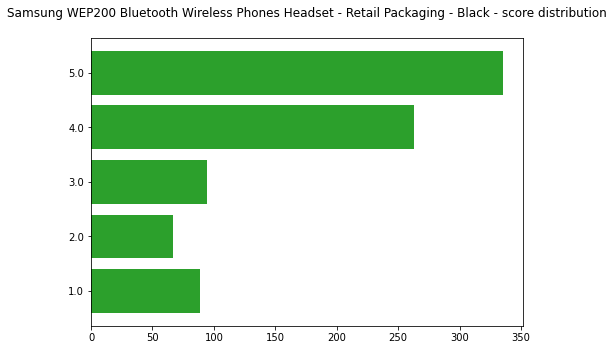

In [ ]:
item_statistics(top10items[2], reviews)

Statistics for Motorola H700 Bluetooth Headset [Motorola Retail Packaging]

General rating: 3.5 
 
Reviews with rating 1.0: 98 
Reviews with rating 2.0: 72 
Reviews with rating 3.0: 79 
Reviews with rating 4.0: 160 
Reviews with rating 5.0: 219 



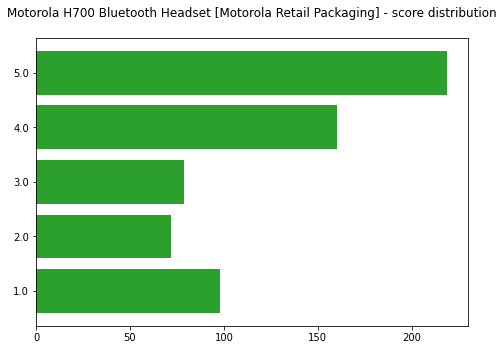

In [ ]:
item_statistics(top10items[3], reviews)

Statistics for Jawbone Noise Shield Bluetooth Headset (Black) [Retail Packaged]

General rating: 3.2 
 
Reviews with rating 1.0: 132 
Reviews with rating 2.0: 88 
Reviews with rating 3.0: 92 
Reviews with rating 4.0: 147 
Reviews with rating 5.0: 164 



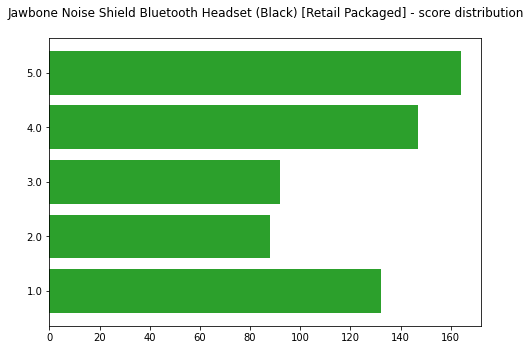

In [ ]:
item_statistics(top10items[4], reviews)

Function item_statistics() can be applied to any item in the dataset to reveal the statistics on it

Conclusion: reviews with score 4.0 and 5.0 are reviews with the largest number. 